<a href="https://colab.research.google.com/github/MinhAnh99/Python_RFM_Analysis/blob/main/MinhAnh_RFM_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Import Libraries
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
!pip install squarify
import squarify

In [9]:
# Loading dataset
Orders_RFM = pd.read_excel('Dataset.xlsx')

In [4]:
Orders_RFM.describe()

,Row ID,Postal Code,Sales,Quantity,Unit Cost
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,53.120197
std,2885.163629,32063.693350,623.245101,2.225110,122.251398
min,1.000000,1040.000000,0.444000,1.000000,0.544500
25%,2499.250000,23223.000000,17.280000,2.000000,3.473600
50%,4997.500000,56430.500000,54.490000,3.000000,12.933600
75%,7495.750000,90008.000000,209.940000,5.000000,54.522000
max,9994.000000,99301.000000,22638.480000,14.000000,4074.926400


In [5]:
Orders_RFM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Row ID       9994 non-null   int64         
 1   Order ID     9994 non-null   object        
 2   Order Date   9994 non-null   datetime64[ns]
 3   Ship Date    9994 non-null   datetime64[ns]
 4   Ship Mode    9994 non-null   object        
 5   Customer ID  9994 non-null   object        
 6   Channel      9994 non-null   object        
 7   Postal Code  9994 non-null   int64         
 8   Product ID   9994 non-null   object        
 9   Sales        9994 non-null   float64       
 10  Quantity     9994 non-null   int64         
 11  Unit Cost    9994 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(3), object(5)
memory usage: 937.1+ KB


In [6]:
Orders_RFM= Orders_RFM[pd.notnull(Orders_RFM['Customer ID'])]
Orders_RFM.head(10)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Cost
0,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,2,76.3945
1,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,FUR-BO-10003441,323.136,4,77.7546
2,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,TEC-PH-10004774,90.930,7,12.6003
3,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,OFF-BI-10003684,52.776,3,10.9950
4,1297,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Corporate,94533,OFF-BI-10002103,13.904,2,4.6926
5,1298,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Corporate,94533,OFF-BI-10004632,20.720,2,7.1225
6,5092,CA-2017-156720,2017-12-30,2018-01-03,Standard Class,JM-15580,Consumer,80538,OFF-FA-10003472,3.024,3,1.2096
7,1878,CA-2017-118885,2017-12-29,2018-01-02,Standard Class,JG-15160,Consumer,90049,FUR-CH-10002880,393.568,4,109.4611
8,1879,CA-2017-118885,2017-12-29,2018-01-02,Standard Class,JG-15160,Consumer,90049,TEC-PH-10002563,302.376,3,93.2326
9,2875,US-2017-102638,2017-12-29,2017-12-31,First Class,MC-17845,Consumer,10035,OFF-FA-10002988,6.030,3,1.0251


In [ ]:
filtered_Orders_RFM=Orders_RFM['Customer ID'].drop_duplicates()

In [ ]:
Returned = pd.read_excel("Dataset.xlsx", sheet_name = "Return")
Returned.head()

,Returned,Order ID
0,Yes,CA-2017-153822
1,Yes,CA-2017-129707
2,Yes,CA-2014-152345
3,Yes,CA-2015-156440
4,Yes,US-2017-155999


In [ ]:
#from datetime import date
#now = date.today()
#now


In [ ]:
max_date = Orders_RFM['Order Date'].max()
max_date

Timestamp('2017-12-30 00:00:00')

In [ ]:
# tính điểm R,F,M của từng khách hàng
RFM = Orders_RFM.groupby('Customer ID').agg({'Order Date':'max','Order ID':'count','Sales':'sum'}).reset_index()
RFM['Order Date'] = (pd.to_datetime('2017-12-31') - RFM['Order Date']).dt.days
RFM.columns = ['Customer ID','Recency','Frequency','Monetary']
print(RFM)

    Customer ID  Recency  Frequency  Monetary
0      AA-10315      185         11  5563.560
1      AA-10375       20         15  1056.390
2      AA-10480      260         12  1790.512
3      AA-10645       56         18  5086.935
4      AB-10015      416          6   886.156
..          ...      ...        ...       ...
788    XP-21865       44         28  2374.658
789    YC-21895        5          8  5454.350
790    YS-21880       10         12  6720.444
791    ZC-21910       55         31  8025.707
792    ZD-21925      203          9  1493.944

[793 rows x 4 columns]


In [ ]:
#3. tính điểm tương ứng với thang điểm từ 1-5
quantiles = RFM.quantile(q=[0.20, 0.40, 0.60, 0.80])
quantiles = quantiles.to_dict()
segmented_RFM = RFM

RFM['Recency_score'] = pd.qcut(RFM['Recency'], 5, ['1','2','3','4','5'])
RFM['Frequency_score'] = pd.qcut(RFM['Frequency'], 5, ['1','2','3','4','5'])
#RFM['Monetary_score'] = pd.qcut(RFM['Monetary'], 5, ['1','2','3','4','5'])
RFM.head()

<ipython-input-27-e6a2042296de>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  quantiles = RFM.quantile(q=[0.20, 0.40, 0.60, 0.80])


,Customer ID,Recency,Frequency,Monetary,Recency_score,Frequency_score,RFM_score
0,AA-10315,185,11,5,4,3,43
1,AA-10375,20,15,2,1,4,14
2,AA-10480,260,12,3,5,3,53
3,AA-10645,56,18,5,3,4,34
4,AB-10015,416,6,1,5,1,51


In [ ]:
RFM["RFM_score"]= RFM["Recency_score"].astype("str") + RFM["Frequency_score"].astype("str")
RFM.head()

,Customer ID,Recency,Frequency,Monetary,Recency_score,Frequency_score,RFM_score
0,AA-10315,185,11,5,4,3,43
1,AA-10375,20,15,2,1,4,14
2,AA-10480,260,12,3,5,3,53
3,AA-10645,56,18,5,3,4,34
4,AB-10015,416,6,1,5,1,51


In [ ]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}


RFM['segment'] = RFM['RFM_score'].replace(seg_map, regex=True)

RFM.head()

,Customer ID,Recency,Frequency,Monetary,Recency_score,Frequency_score,RFM_score,segment
0,AA-10315,185,11,5,4,3,43,potential_loyalists
1,AA-10375,20,15,2,1,4,14,at_Risk
2,AA-10480,260,12,3,5,3,53,potential_loyalists
3,AA-10645,56,18,5,3,4,34,loyal_customers
4,AB-10015,416,6,1,5,1,51,new_customers


In [ ]:
RFM[["segment","Recency","Frequency","Monetary"]].groupby("segment").agg(["mean","count"])

<ipython-input-31-167e546105f0>:1: FutureWarning: ['Monetary'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  RFM[["segment","Recency","Frequency","Monetary"]].groupby("segment").agg(["mean","count"])


Recency        Frequency      
                           mean count       mean count
segment                                               
about_to_sleep        75.238806    67   7.462687    67
at_Risk               25.155405   148  14.101351   148
cant_loose            26.864865    74  22.945946    74
champions            390.843750    32  18.281250    32
hibernating           27.270833    96   7.635417    96
loyal_customers      114.446281   121  18.561983   121
need_attention        79.724138    29  12.000000    29
new_customers        508.275362    69   4.724638    69
potential_loyalists  281.865079   126  10.317460   126
promising            147.870968    31   5.516129    31

Text(0.5, 1.0, 'Total Number for each RFM_Score')

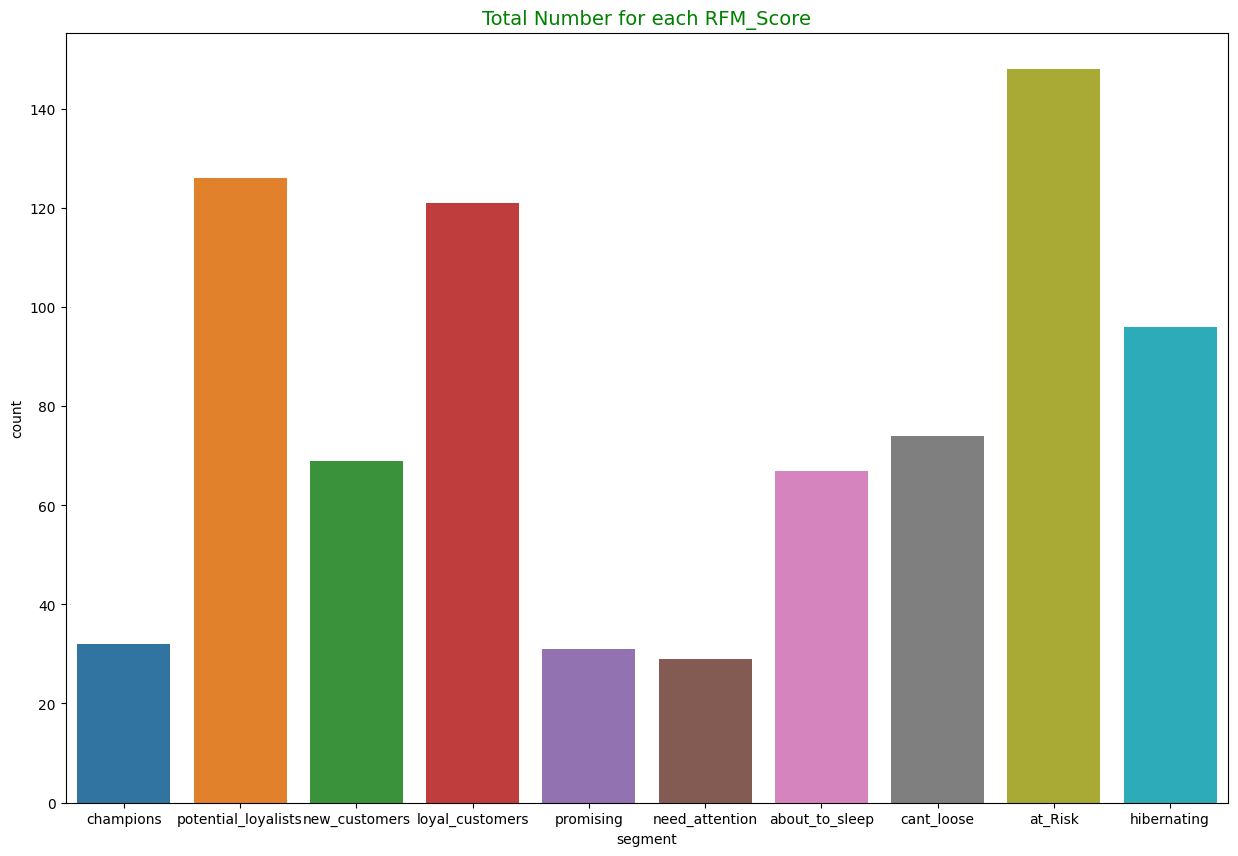

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
RFM_ss = RFM.sort_values(by=['RFM_score'],ascending=False)
plt.figure(figsize=(15,10));
sns.countplot(x="segment",data=RFM_ss)
plt.title("Total Number for each RFM_Score", fontsize = 14, color="Green")

In [ ]:
#def Customer_segment(RFM):

    #if (RFM_Score >= 1) & (RFM_Score <= 1.5):
    #    return 'Risky'

#    elif (RFM_Score >= 2) & (RFM_Score <= 2.5):
#        return 'Hold and improve'

#    elif (RFM_Score >= 3) & (RFM_Score <= 3.5):
#        return 'Hold and improve'

#    elif ((RFM_Score >= 3.5) & (RFM_Score <= 4.5)) or ((RFM_Score >= 5) & (RFM_Score <= 5)) or (RFM_Score == 5):
#        return 'Loyal'

#    elif (RFM_Score == 4.5) or (RFM_Score >= 5) & (RFM_Score <= 5):
#        return 'VIP'

#    else:
#        return 'Other'

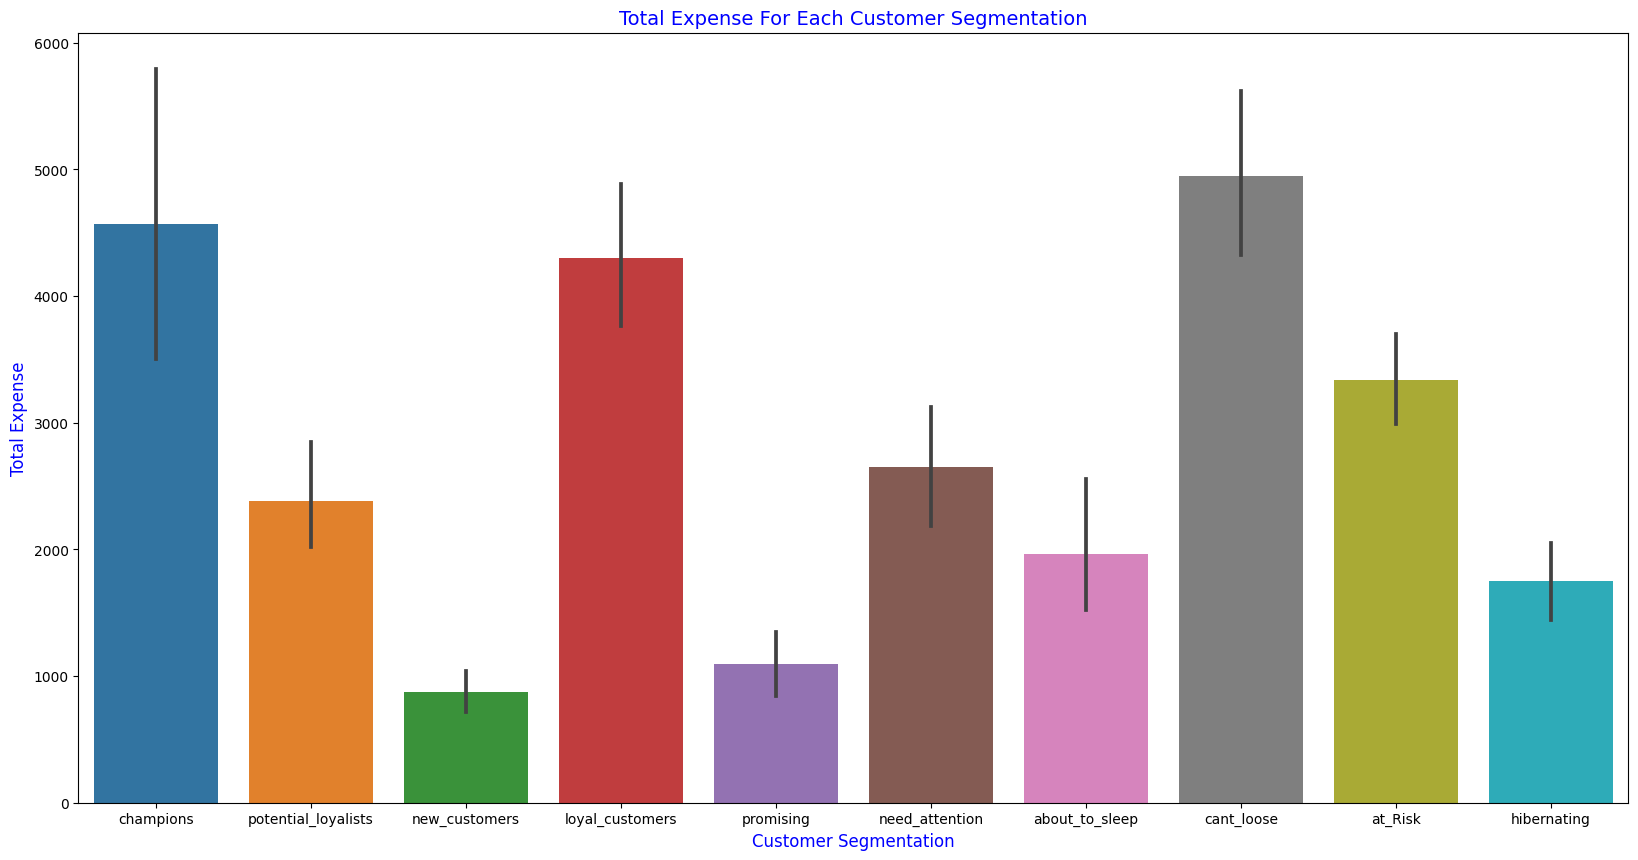

In [ ]:
plt.figure(figsize=(20,10));
sns.barplot(data = RFM_ss, x='segment', y='Monetary', linewidth=0.2)
plt.ylabel("Total Expense",fontsize = 12,color="blue" );
plt.xlabel("Customer Segmentation",fontsize = 12 , color = 'blue');
plt.title("Total Expense For Each Customer Segmentation", fontsize = 14, color="Blue")
plt.show()